In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import os
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import inception_v3

In [ ]:
training_data_path = pathlib.Path(r"drive/MyDrive/task_1/train")
testing_data_path = pathlib.Path(r"drive/MyDrive/task_1/test")
valid_data_path = pathlib.Path(r"drive/MyDrive/task_1/valid")

In [ ]:
#This code is taken and modified from a notebook: https://www.kaggle.com/saileshnair/intel-image-classification

def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][100:106]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 6, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')


In [ ]:
img_height = 224
img_width = 224
batch_size = 100

training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                                    shear_range=0.2,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True,
                                                                    vertical_flip=True,
                                                                    rescale=1/255.0,
                                                                    validation_split=0)

train_generator = training_data_gen.flow_from_directory(training_data_path,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='training') # set as training data


training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                                    shear_range=0.2,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True,
                                                                    vertical_flip=True,
                                                                    rescale=1/255.0,
                                                                    validation_split=0.99)
validation_generator = training_data_gen.flow_from_directory(valid_data_path, # same directory as training data
                                                             target_size=(img_height, img_width),
                                                             batch_size=batch_size,
                                                             shuffle=True,
                                                             class_mode='categorical',
                                                             subset='validation') # set as validation data

#-------------------------------------------------------------------------------------------------------------

testing_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

test_generator = testing_data_gen.flow_from_directory(testing_data_path,
                                                      target_size=(img_height, img_width),
                                                      batch_size=batch_size,
                                                      seed=0,
                                                      shuffle=False,
                                                      class_mode='categorical')

Found 2001 images belonging to 5 classes.
Found 495 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/Screenshot-from-2018-10-17-11-14-10.png',
      width=750,
      height=500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Image(url='https://miro.medium.com/max/2434/1*_rCyzi7fQzc_Q1gCqSLM1g.png',
      width=750,
      height=500)

In [ ]:
base_model = inception_v3.InceptionV3(weights='imagenet', include_top=False,
                                     input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
inc_model = tf.keras.models.Sequential()

inc_model .add(base_model)

inc_model.add(tf.keras.layers.Flatten())
inc_model.add(tf.keras.layers.Dense(256, activation='relu'))
inc_model.add(tf.keras.layers.BatchNormalization())
inc_model.add(tf.keras.layers.Dropout(0.4))

inc_model.add(tf.keras.layers.Dense(128, activation='relu'))
inc_model.add(tf.keras.layers.BatchNormalization())
inc_model.add(tf.keras.layers.Dropout(0.4))


inc_model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
inc_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 batch_normalization_192 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
inc_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [ ]:
history = inc_model.fit(train_generator, steps_per_epoch=(len(train_generator)),
validation_data= validation_generator, validation_steps=(len(validation_generator)),
              epochs=10)

Epoch 1/10
21/21 [==============================] - 404s 19s/step - loss: 0.6782 - acc: 0.7721 - val_loss: 1.6134 - val_acc: 0.7010
Epoch 2/10
21/21 [==============================] - 41s 2s/step - loss: 0.3518 - acc: 0.8761 - val_loss: 0.5890 - val_acc: 0.8444
Epoch 3/10
21/21 [==============================] - 40s 2s/step - loss: 0.2813 - acc: 0.9070 - val_loss: 0.4812 - val_acc: 0.8566
Epoch 4/10
21/21 [==============================] - 42s 2s/step - loss: 0.2633 - acc: 0.9065 - val_loss: 0.3465 - val_acc: 0.8848
Epoch 5/10
21/21 [==============================] - 42s 2s/step - loss: 0.2474 - acc: 0.9165 - val_loss: 0.3354 - val_acc: 0.8949
Epoch 6/10
21/21 [==============================] - 40s 2s/step - loss: 0.2356 - acc: 0.9165 - val_loss: 0.3070 - val_acc: 0.9131
Epoch 7/10
21/21 [==============================] - 39s 2s/step - loss: 0.2358 - acc: 0.9250 - val_loss: 0.2537 - val_acc: 0.9071
Epoch 8/10
21/21 [==============================] - 42s 2s/step - loss: 0.2090 - acc: 0.

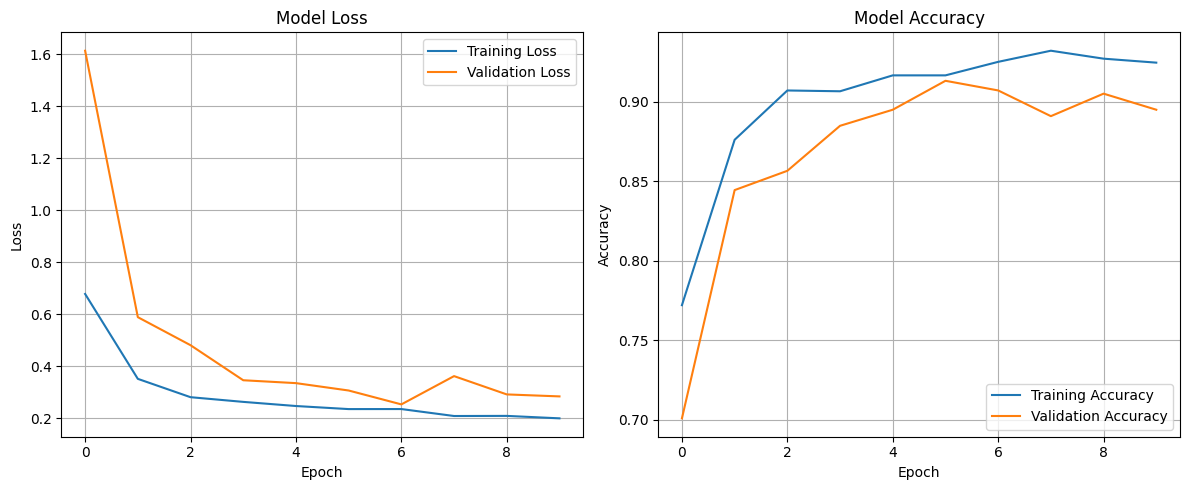

In [ ]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')  # Change 'accuracy' to 'acc'
plt.plot(history.history['val_acc'], label='Validation Accuracy')  # Change 'val_accuracy' to 'val_acc'
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
inc_model.evaluate(test_generator)

5/5 [==============================] - 107s 27s/step - loss: 0.0419 - acc: 0.9840


[0.04189513996243477, 0.984000027179718]

In [ ]:
base_model.trainable = True

se_trainable = False

for layer in base_model.layers:
    if layer.name == "conv2d_945":
        set_trainable = True
    if se_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
inc_model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
                  metrics=['acc'])

In [ ]:
history = inc_model.fit(train_generator, steps_per_epoch=(len(train_generator)),
validation_data= validation_generator, validation_steps=(len(validation_generator)),
              epochs=10)

Epoch 1/10
21/21 [==============================] - 42s 2s/step - loss: 0.1843 - acc: 0.9350 - val_loss: 0.2624 - val_acc: 0.9131
Epoch 2/10
21/21 [==============================] - 39s 2s/step - loss: 0.1516 - acc: 0.9445 - val_loss: 0.3283 - val_acc: 0.9051
Epoch 3/10
21/21 [==============================] - 40s 2s/step - loss: 0.1735 - acc: 0.9370 - val_loss: 0.2537 - val_acc: 0.8990
Epoch 4/10
21/21 [==============================] - 40s 2s/step - loss: 0.1526 - acc: 0.9475 - val_loss: 0.2607 - val_acc: 0.9091
Epoch 5/10
21/21 [==============================] - 40s 2s/step - loss: 0.1644 - acc: 0.9415 - val_loss: 0.2595 - val_acc: 0.9071
Epoch 6/10
21/21 [==============================] - 40s 2s/step - loss: 0.1649 - acc: 0.9460 - val_loss: 0.2837 - val_acc: 0.9030
Epoch 7/10
21/21 [==============================] - 40s 2s/step - loss: 0.1804 - acc: 0.9385 - val_loss: 0.2632 - val_acc: 0.9212
Epoch 8/10
21/21 [==============================] - 40s 2s/step - loss: 0.1601 - acc: 0.94

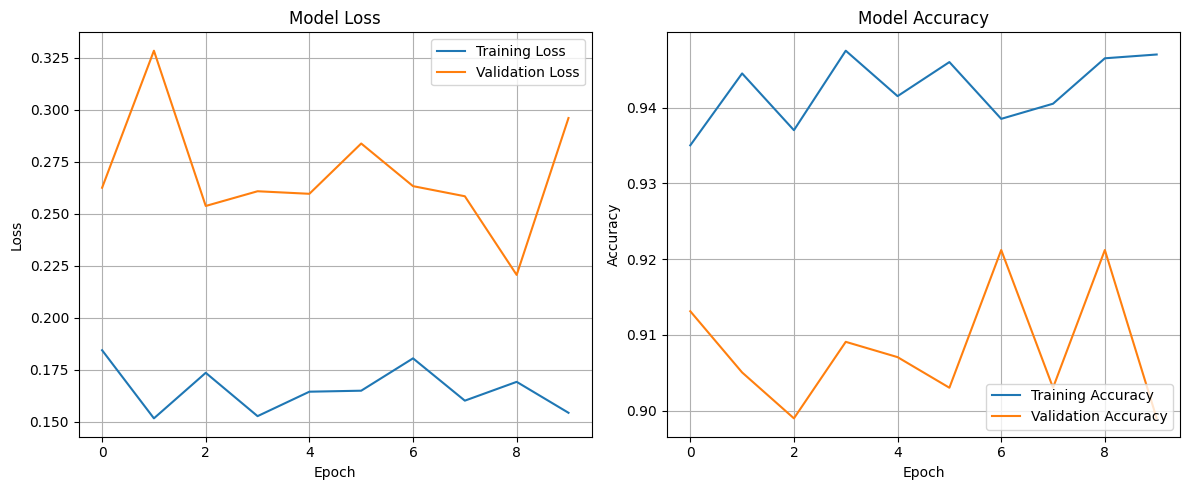

In [ ]:
# Plot training & validation loss and accuracy values
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')  # Change 'accuracy' to 'acc'
plt.plot(history.history['val_acc'], label='Validation Accuracy')  # Change 'val_accuracy' to 'val_acc'
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
inc_model.evaluate(test_generator)

5/5 [==============================] - 3s 456ms/step - loss: 0.0471 - acc: 0.9880


[0.04705271124839783, 0.9879999756813049]

In [ ]:
from tensorflow.keras.optimizers import Adam

# Create an Adam optimizer instance
optimizer = Adam()

# Print the optimizer's configuration
print(optimizer.get_config())

{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
